In [1]:
import sys  
sys.path.insert(0, '../')
from tools.training import make_training, test_on_dataset
from imagenet_models.resnet import resnet18

import torch.nn as nn
import torch

In [2]:
variation = "original"

In [3]:
net = resnet18(pretrained=True)
temp_net = resnet18(pretrained=False)

In [4]:
net.fc = nn.Linear(512, 9)
temp_net.fc = nn.Linear(512, 9)

In [5]:
n_epoch_first_train = 10
n_cycle = 10
n_epoch_cycle = 5

using cuda



Finished Training
Final acc :  100.0

Accuracy Graph


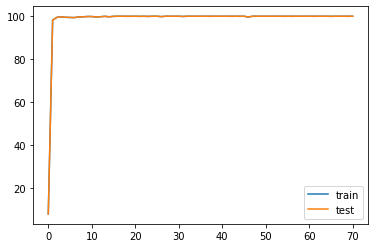


Loss Graph


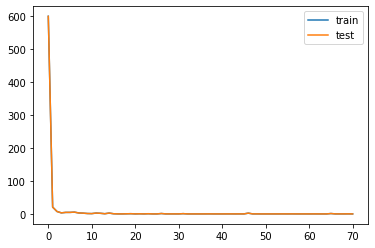


Learning Rate Curve


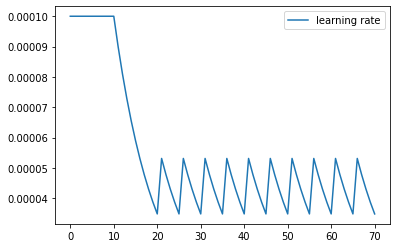

In [6]:
make_training(variation,
              net,
              temp_net,
              n_epoch_first_train = n_epoch_first_train,
              n_cycle = n_cycle,
              n_epoch_cycle = n_epoch_cycle,
              batch_size = 16,
              workers = 0,
              criterion = nn.CrossEntropyLoss(),
              test_acc_period = 5,
              _print = False)

In [8]:
PATH = "../models/ResNet_numcycle_" + str(n_cycle) + "_noSWA.pt"
torch.save(net.state_dict(), PATH)

PATH = "../models/ResNet_numcycle_" + str(n_cycle) + "_SWA.pt"
torch.save(temp_net.state_dict(), PATH)

In [9]:
for variation in ["original","mixed_same", "mixed_next", "mixed_rand", "no_fg", "only_bg_b", "only_bg_t", "only_fg"] :
    acc = test_on_dataset(variation = variation, net=net)
    print("Accuracy on ", variation, " : ", acc)

Accuracy on  original  :  100.0
Accuracy on  mixed_same  :  91.06172839506173
Accuracy on  mixed_next  :  77.53086419753086
Accuracy on  mixed_rand  :  81.03703703703704
Accuracy on  no_fg  :  60.32098765432099
Accuracy on  only_bg_b  :  30.469135802469136
Accuracy on  only_bg_t  :  36.81481481481482
Accuracy on  only_fg  :  90.0246913580247


In [10]:
for variation in ["original","mixed_same", "mixed_next", "mixed_rand", "no_fg", "only_bg_b", "only_bg_t", "only_fg"] :
    acc = test_on_dataset(variation = variation, net=temp_net)
    print("Accuracy on ", variation, " : ", acc)

Accuracy on  original  :  100.0
Accuracy on  mixed_same  :  94.91358024691358
Accuracy on  mixed_next  :  82.69135802469135
Accuracy on  mixed_rand  :  85.25925925925925
Accuracy on  no_fg  :  65.4320987654321
Accuracy on  only_bg_b  :  29.48148148148148
Accuracy on  only_bg_t  :  37.97530864197531
Accuracy on  only_fg  :  94.8395061728395
